<a href="https://colab.research.google.com/github/SakshiPatial1234/Fake-News-Detection/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)
It allows us to uncover patterns and insights, often with visual methods, within data. EDA is often the first step of the data modelling process

In [ ]:
# ignoring warnings to remove clutter 
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import os
import json
import string
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

!pip install gensim
!pip install lightgbm

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  # stop words are, is, the etc. which are not needed for model
from nltk.stem.porter import PorterStemmer
from gensim.models import word2vec
from sklearn.manifold import TSNE

%matplotlib inline

from plotly import tools  # to install $ pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier 
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb # to install $ pip install lightgbm
from PIL import Image

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# only for google colab
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [ ]:
from io import BytesIO
df = pd.read_csv('Data.csv')
print(df.shape)

(3709, 32)


In [ ]:
# Drop unwanted columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'ord_in_thread', 'replies_count', 'participants_count', 'country','likes', 'comments', 'site_url', 'language','content', 'ord_in_thread', 'uuid', 'crawled'], axis=1, inplace=True)

In [ ]:
df.head()

,author,published,title,text,domain_rank,thread_title,spam_score,main_img_url,shares,type,spam_score_fector,category_factor,fake,click_bait_score,toxicity_factor,src_url_polarity,sentiment_score,stance
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,Print They should pay all the back all the mon...,88465,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.993337,business,0,0.999951,0,1.0,0.1355,discuss
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,88465,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.824470,business,0,0.997981,0,1.0,0.0000,discuss
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,88465,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.998415,business,0,0.001113,0,1.0,0.0000,discuss
3,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,88465,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,bias,0.982233,sport,0,0.001539,0,1.0,-0.2680,discuss
4,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,88465,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,bias,0.976653,business,0,0.998544,0,1.0,0.4670,unrelated


## Let's check correlations in factors to determine multiplier factor.

###To show heatmap data should be in matrix form.

In [ ]:
tc = df.corr()   
tc

,domain_rank,spam_score,shares,spam_score_fector,fake,click_bait_score,toxicity_factor,src_url_polarity,sentiment_score
domain_rank,1.000000,-0.064454,-0.020997,0.120741,-0.249628,0.028643,0.020848,0.014631,0.032460
spam_score,-0.064454,1.000000,0.006128,-0.103725,0.172558,0.029195,0.013025,-0.076754,0.049220
shares,-0.020997,0.006128,1.000000,0.005124,0.049648,-0.015414,-0.020004,-0.006060,0.052054
spam_score_fector,0.120741,-0.103725,0.005124,1.000000,-0.601603,-0.013450,0.035137,0.280719,-0.073461
fake,-0.249628,0.172558,0.049648,-0.601603,1.000000,-0.015002,-0.032278,-0.403428,0.087230
click_bait_score,0.028643,0.029195,-0.015414,-0.013450,-0.015002,1.000000,0.007328,0.013047,-0.013451
toxicity_factor,0.020848,0.013025,-0.020004,0.035137,-0.032278,0.007328,1.000000,0.027776,-0.010067
src_url_polarity,0.014631,-0.076754,-0.006060,0.280719,-0.403428,0.013047,0.027776,1.000000,-0.064444
sentiment_score,0.032460,0.049220,0.052054,-0.073461,0.087230,-0.013451,-0.010067,-0.064444,1.000000


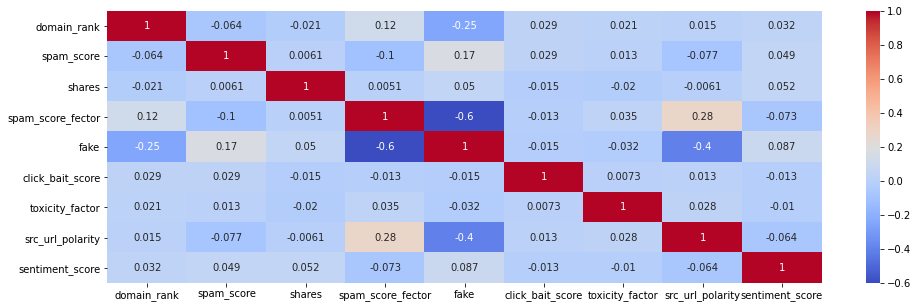

In [ ]:
plt.figure(figsize = (16,5))
sns.heatmap(tc, annot=True, cmap='coolwarm')

# Pair Plot

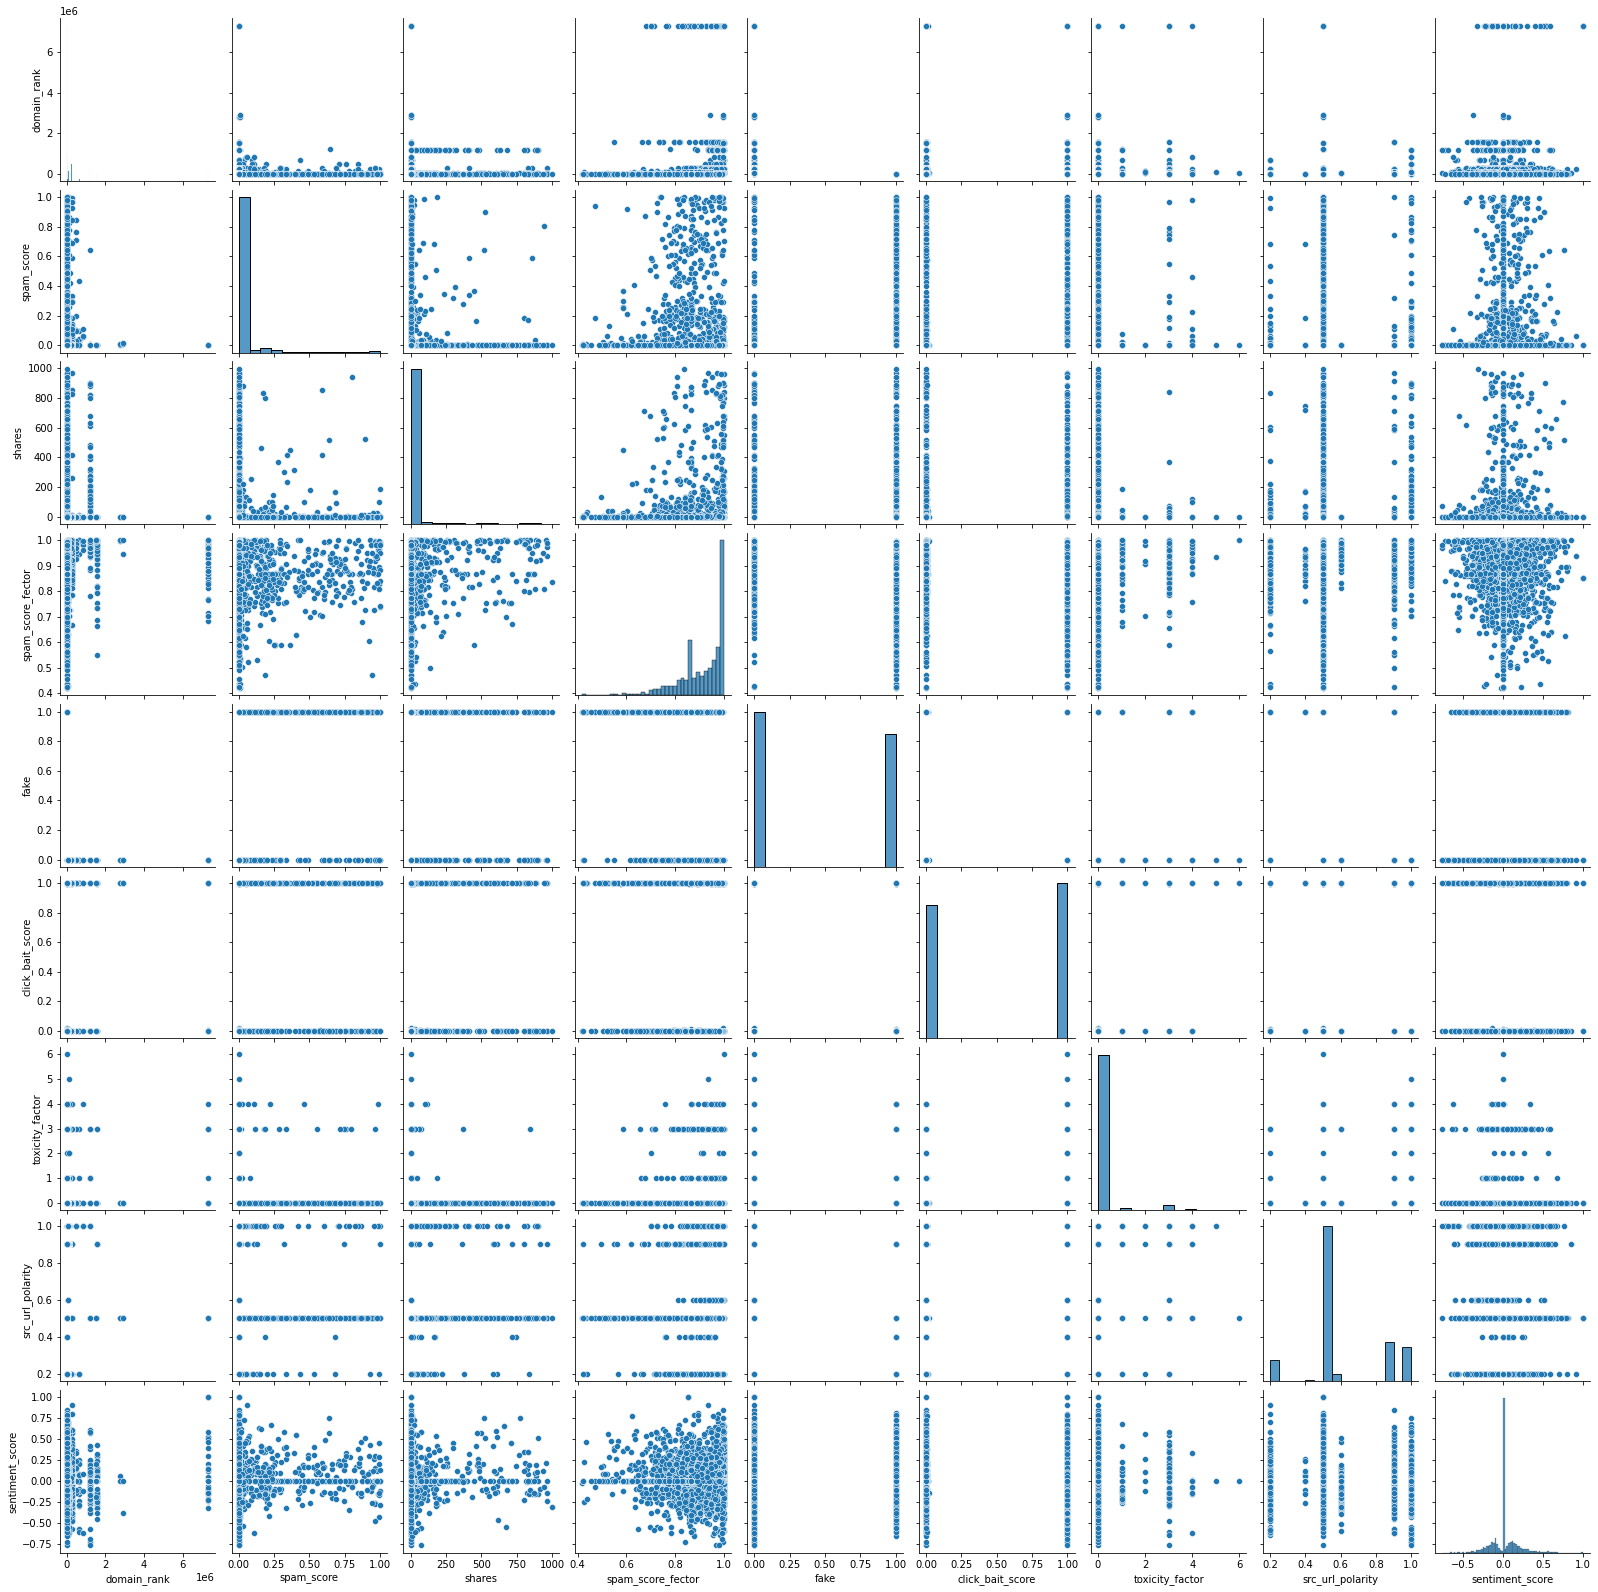

In [ ]:
import seaborn as sns
sns.pairplot(df)

## Target Distribution
First let us look at the distribution of the target variable to understand more about the imbalance and so on.

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

#plotly fix
configure_plotly_browser_state()

## target count ##
cnt_srs = df['type'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Target distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

So about 53.8% of the data is insincere news (target=1) and rest of them are sincere news.

# Word Cloud
Now let us look at the frequently occuring words in the data by creating a word cloud on the 'text' column.

In [ ]:
!pip install wordcloud
import requests
from wordcloud import WordCloud, STOPWORDS  

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  


# <center>Word cloud for real words</center>

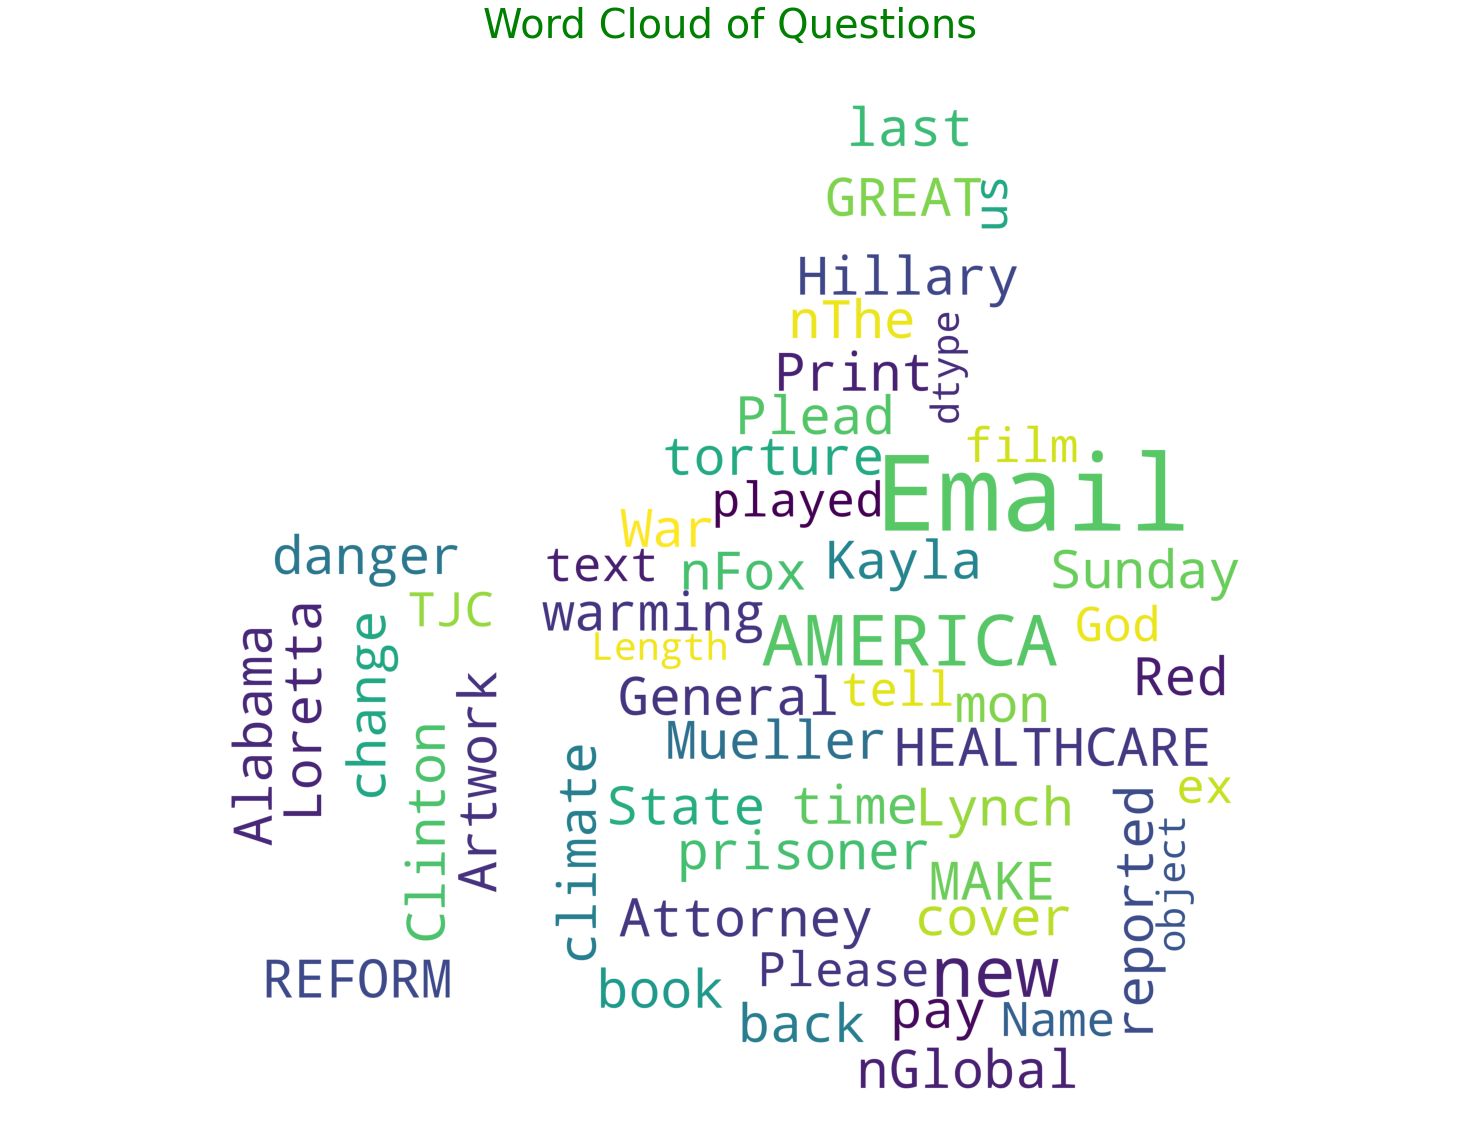

In [ ]:

response = requests.get('https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png')
upvote_mask = np.array(Image.open(BytesIO(response.content)))
plot_wordcloud(df[df["fake"]==0]["text"], upvote_mask, max_words=300000, max_font_size=300, title="Word Cloud of Questions")

#<center>Word cloud for Fake words

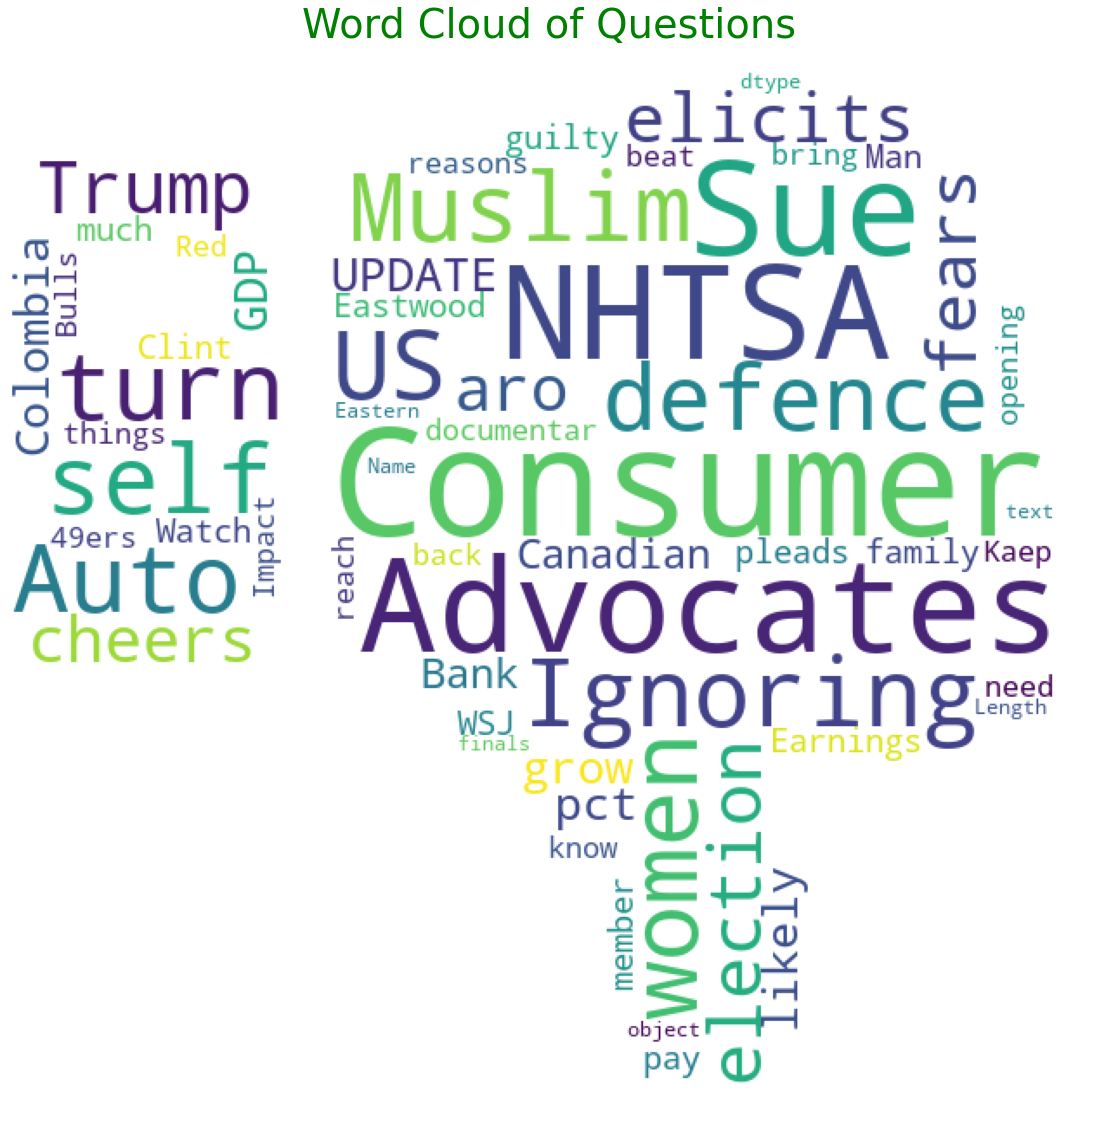

In [ ]:
response = requests.get('https://image.freepik.com/free-icon/thumbs-down-silhouette_318-41911.jpg')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
plot_wordcloud(df[df["fake"]==1]["text"], upvote_mask, max_words=300000, max_font_size=300, title="Word Cloud of Questions")

There seem to be a variety of segregating words are there. May be it is a good idea to look at the most frequent words in each of the classes separately and compare.

### Word Frequency plot of real and fake news:

In [ ]:
from collections import defaultdict
df_real = df[df["type"]=='news']
df_fake = df[df["type"]!='news']

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [ ]:
# for colab plotly
configure_plotly_browser_state()

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of real news", 
                                          "Frequent words of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Observations:**

* Some of the top words are common across both the classes like 'trump', 'elect', 'obama' etc
* The other top words in real news after excluding the common ones at the very top are 'open', 'question' etc
* The other top words in insincere questions after excluding the common ones are 'trump', 'men', 'us' etc <br>

**Now let us also create bigram frequency plots for both the classes separately to get more idea.**

In [ ]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of real news", 
                                          "Frequent bigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Observations:**

* We can see fake news are targating specific people, country, race or age.

**Now let's usl look at the trigram plots as well.**

In [ ]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of real news", 
                                          "Frequent trigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Observations:**

We can see fake news are targating specific people, Country, race or age.

## Meta Features:

Now let us create some meta features and then look at how they are distributed between the classes. The ones that we will create are

1. Number of words in the text
2. Number of unique words in the text
3. Number of characters in the text
4. Number of stopwords
5. Number of punctuations
6. Number of upper case words
7. Number of title case words
8. Average length of the words

In [ ]:
## Number of words in the text ##
df["num_words"] = df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df["num_unique_words"] = df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df["num_chars"] = df["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df["num_stopwords"] = df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
df["num_punctuations"] =df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df["num_words_upper"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df["num_words_title"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df["mean_word_len"] = df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

**Now let us see how these meta features are distributed between both fake and real news.**

## Truncate some extreme values for better visuals 

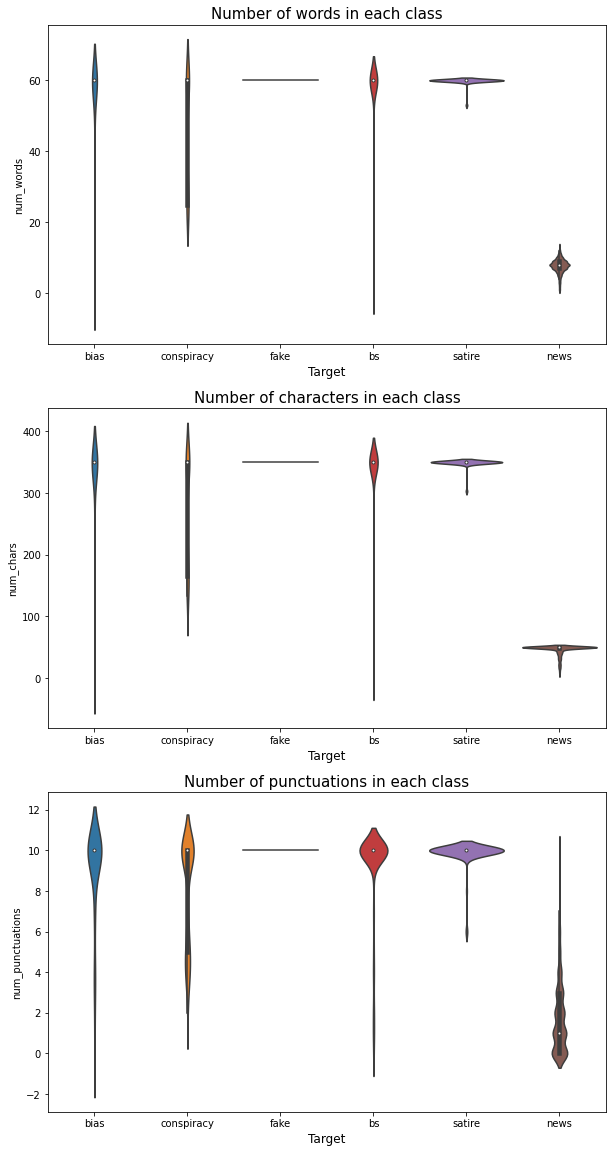

In [ ]:
df['num_words'].loc[df['num_words']>60] = 60 #truncation for better visuals
df['num_punctuations'].loc[df['num_punctuations']>10] = 10 #truncation for better visuals
df['num_chars'].loc[df['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.violinplot(x='type', y='num_words', data=df, ax=axes[0])
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.violinplot(x='type', y='num_chars', data=df, ax=axes[1])
axes[1].set_xlabel('Target', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.violinplot(x='type', y='num_punctuations', data=df, ax=axes[2])
axes[2].set_xlabel('Target', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

**Inference:**

We can see that the fake news have more number of words as well as characters compared to real news. So this might be a useful feature in our model.

## Visualizing Word Vectors

In [ ]:
import nltk
import re

from gensim.models import word2vec
from sklearn.manifold import TSNE

In [ ]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in df["text"].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

In [ ]:
corpus = build_corpus(data)        
#corpus[0:2] # can see individual tokens

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

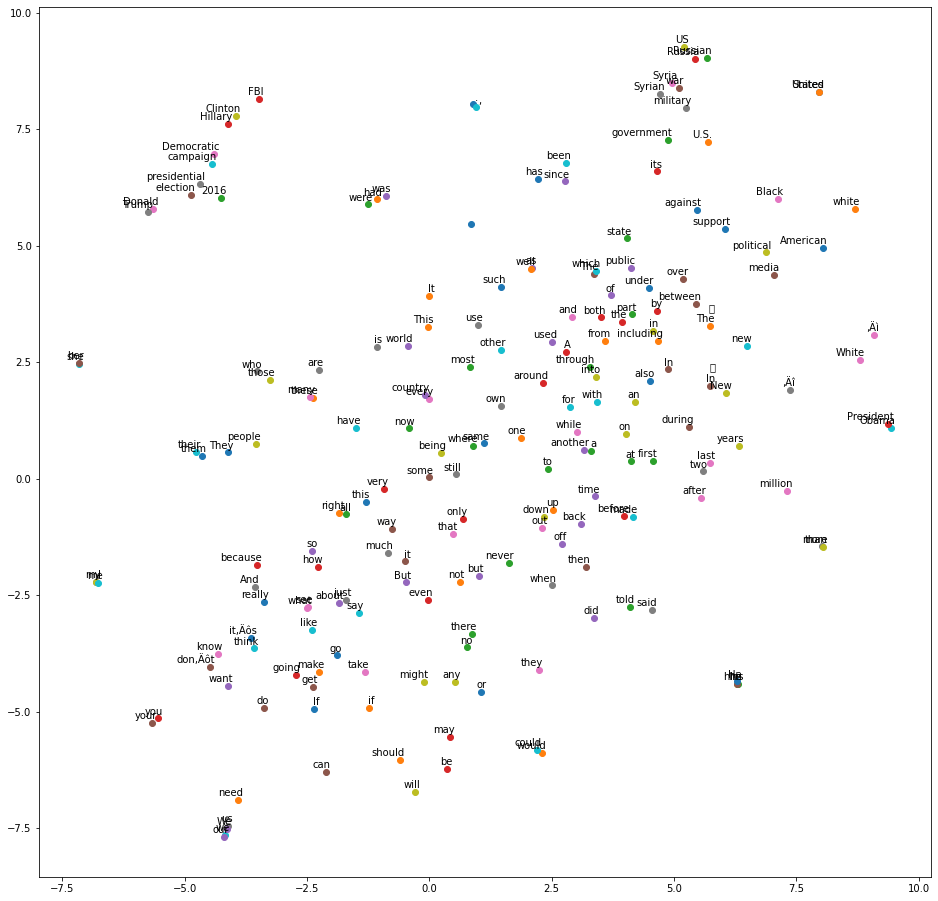

In [ ]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

We can see tokens which are closer are similar.

In [ ]:
model.most_similar('will')

[('should', 0.6290552616119385),
 ('may', 0.5948728322982788),
 ('be', 0.5853815078735352),
 ('take', 0.4946797490119934),
 ('country', 0.49466389417648315),
 ('can', 0.46790796518325806),
 ('any', 0.43779975175857544),
 ('every', 0.42593538761138916),
 ('is', 0.4095190763473511),
 ('If', 0.40851089358329773)]

#### Let's check correlation against target after massaging data and feature engineering.

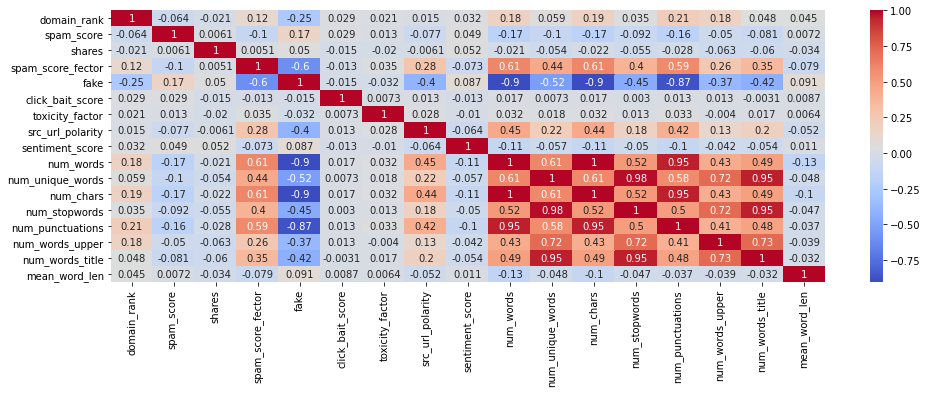

In [ ]:
tc = df.corr()   #shows corelation in matrix form
plt.figure(figsize = (16,5))
sns.heatmap(tc, annot=True, cmap='coolwarm')

**Note:** As per importance we can say our NLP non scalar features are quite valuable along with Word count and domain rank.